# Monthly Price Data

Information about the columns:

| Field | Description | Notes | 
| --- | --- | --- | 
| DateTime | The date the price was forecasted (the time when the price is measured) | format: yyyy-mm-dd  | 
| DeliveryStartDate | The forward maturities - the month the price represents (the maturity to the supply of energy)| format: yyyy-mm-dd   | 
| Price  | Market Price - the price that is expected for the specific DeliveryStartDate's month | Unit: BRL per MWh (Brazilian Real per Mega Watt/ hour) |
| Region | Different geographic and hydrological regions in Brazil | For Price, we only look at Southeast/ Central-West (SE/CW) |

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import get_prepared_data as gpd
from scipy.stats import skew

In [2]:
from get_prepared_data import get_hydro_inflow_cleaned, get_settlement_price_data_cleaned,get_market_price_data_cleaned
df_market_price = get_market_price_data_cleaned()
df_settlemet_price = get_settlement_price_data_cleaned()
df_hydro = get_hydro_inflow_cleaned()

In [3]:
# Calculate the skewness for the average settlement price
skew_settlement_price = skew(df_settlemet_price['average_settlement_price'])

# Create a DataFrame to display the skewness value
settlement_price_skewness_df = pd.DataFrame({
    'Skewness': [skew_settlement_price]
}, index=['average_settlement_price'])

# Display the skewness result
print(settlement_price_skewness_df)

                          Skewness
average_settlement_price  5.390311


In [4]:
df_market_price.head()

,DateTime,DeliveryStartDate,Forward Price,Year,Month,Day,Day Of Week,Region
0,2021-04-30,2021-05-01,218.37,2021,4,30,Friday,SE/CW
1,2021-04-30,2021-06-01,322.73,2021,4,30,Friday,SE/CW
2,2021-04-30,2021-07-01,409.43,2021,4,30,Friday,SE/CW
3,2021-04-30,2021-08-01,411.49,2021,4,30,Friday,SE/CW
4,2021-04-30,2021-09-01,411.49,2021,4,30,Friday,SE/CW


In [5]:
from get_prepared_data import merge_prices_and_hydro

df_all = merge_prices_and_hydro()

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59558 entries, 0 to 59557
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DateTime                      59558 non-null  datetime64[ns]
 1   DeliveryStartDate             59558 non-null  datetime64[ns]
 2   Forward Price                 59558 non-null  float64       
 3   Year                          59558 non-null  int64         
 4   Month                         59558 non-null  int64         
 5   Day                           59558 non-null  int64         
 6   Day Of Week                   59558 non-null  object        
 7   Region                        59558 non-null  object        
 8   Date                          59558 non-null  object        
 9   average_settlement_price      59558 non-null  float64       
 10  variance_in_settlement_price  59558 non-null  float64       
 11  std_settlement_price        

In [7]:
#The range of the DateTime and DeliveryStartDate columns
print(f"DateTime range: {df_market_price['DateTime'].min()} to {df_market_price['DateTime'].max()}")
print(f"DeliveryStartDate range: {df_market_price['DeliveryStartDate'].min()} to {df_market_price['DeliveryStartDate'].max()}")


DateTime range: 2021-04-30 00:00:00 to 2024-10-07 00:00:00
DeliveryStartDate range: 2021-04-01 00:00:00 to 2045-12-01 00:00:00


In [8]:
print (df_market_price.Year.unique(), "\n")
print ("Total Number of Unique Year", df_market_price.Year.nunique(),  "\n")


[2021 2022 2023 2024] 

Total Number of Unique Year 4 



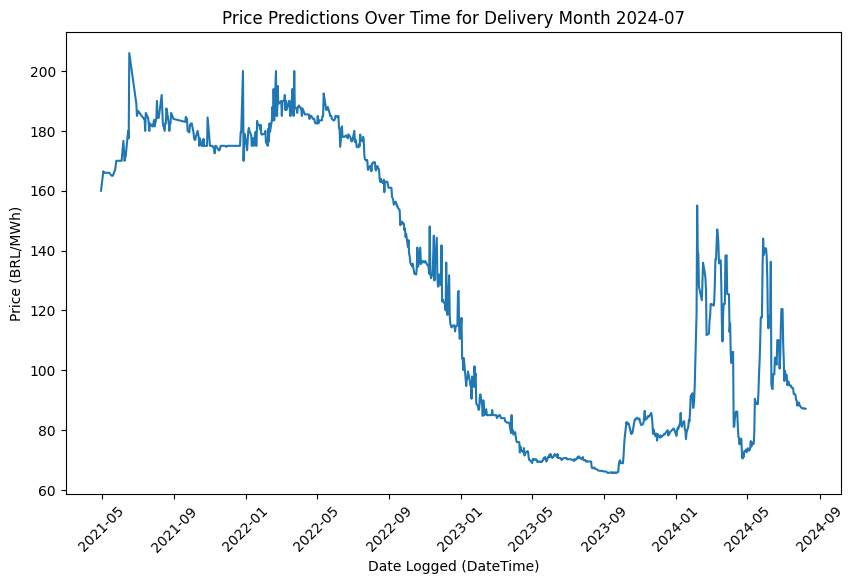

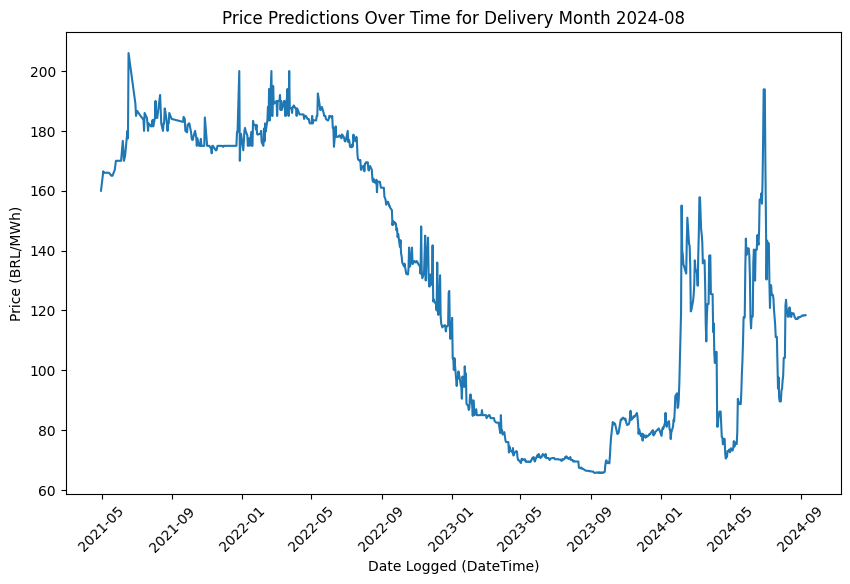

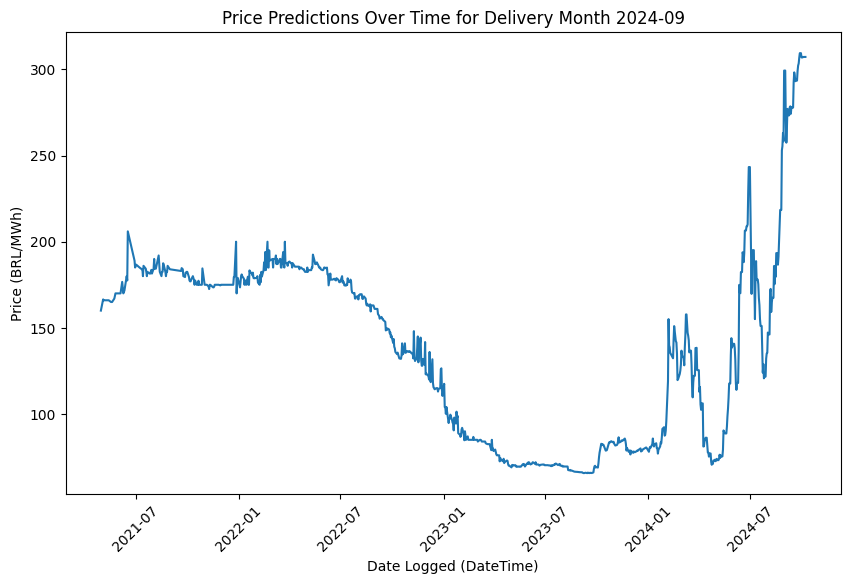

In [9]:
# Loop through a list of delivery months and plot each
delivery_months = ['2024-07-01', '2024-08-01', '2024-09-01']

for month in delivery_months:
    df_filtered = df_market_price[df_market_price['DeliveryStartDate'] == month]
    
    # Plot the changes in predicted prices over time for each DeliveryStartDate
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_filtered, x='DateTime', y='Forward Price')
    plt.title(f'Price Predictions Over Time for Delivery Month {month[:7]}')
    plt.xlabel('Date Logged (DateTime)')
    plt.ylabel('Price (BRL/MWh)')
    plt.xticks(rotation=45)
    plt.show()


C:\Users\veron\AppData\Local\Temp\ipykernel_34800\2831940926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_2025['DateTime'] = df_2022_2025['DateTime'].dt.strftime('%Y-%m')
C:\Users\veron\AppData\Local\Temp\ipykernel_34800\2831940926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_2025['DeliveryStartDate'] = df_2022_2025['DeliveryStartDate'].dt.strftime('%Y-%m')


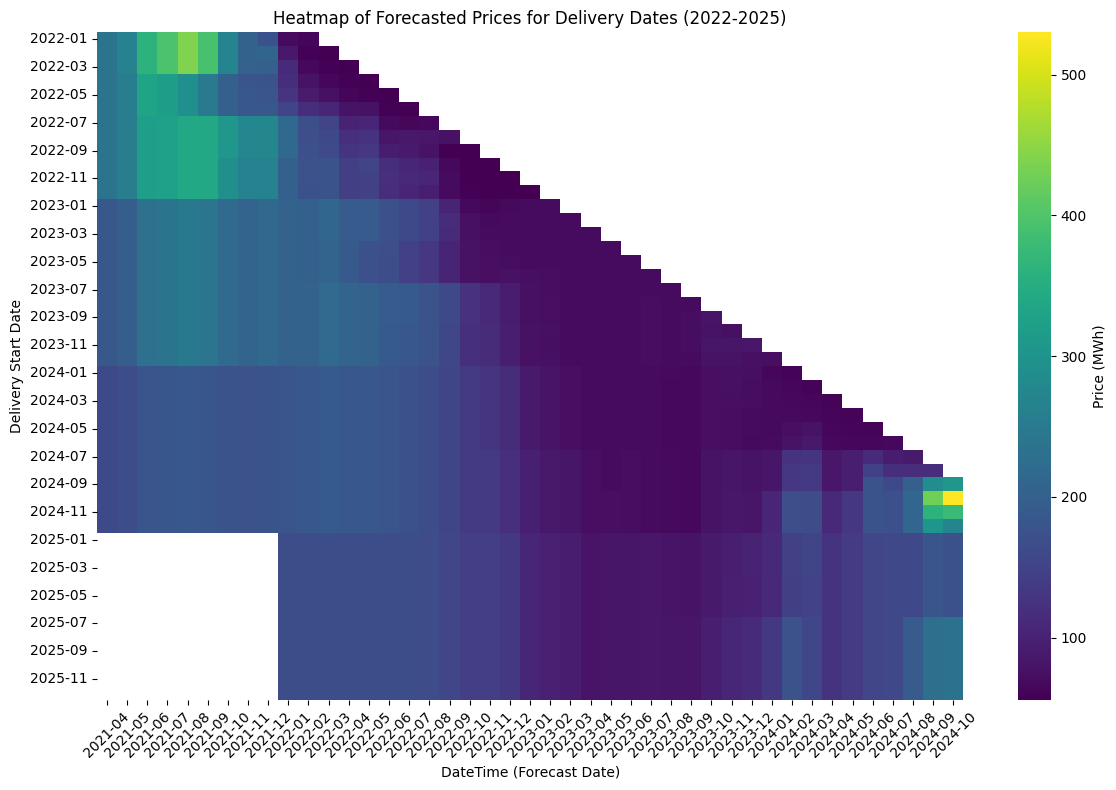

In [10]:
df_2022_2025 = df_market_price[df_market_price['DeliveryStartDate'].between('2022-01-01', '2025-12-31')]

# Convert the DateTime column to only show the date
df_2022_2025['DateTime'] = df_2022_2025['DateTime'].dt.strftime('%Y-%m')
df_2022_2025['DeliveryStartDate'] = df_2022_2025['DeliveryStartDate'].dt.strftime('%Y-%m')

# Pivot the data for the heatmap
heatmap_data = df_2022_2025.pivot_table(index='DeliveryStartDate', columns='DateTime', values='Forward Price')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Price (MWh)'})

plt.title('Heatmap of Forecasted Prices for Delivery Dates (2022-2025)')
plt.xlabel('DateTime (Forecast Date)')
plt.ylabel('Delivery Start Date')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

C:\Users\veron\AppData\Local\Temp\ipykernel_34800\3250276390.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_2025['DateTime'] = pd.to_datetime(df_2022_2025['DateTime'])
C:\Users\veron\AppData\Local\Temp\ipykernel_34800\3250276390.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_2025['DeliveryStartDate'] = pd.to_datetime(df_2022_2025['DeliveryStartDate'])
C:\Users\veron\AppData\Local\Temp\ipykernel_34800\3250276390.py:44: UserWarning: Tight layout not applied. The left and right margi

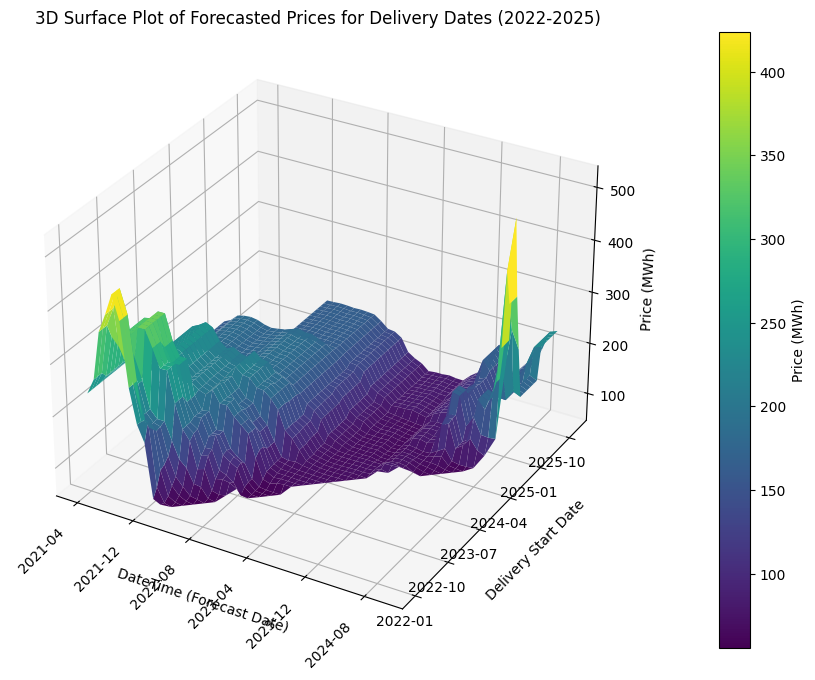

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming df_2022_2025 is already prepared as in your code

# Convert the DateTime and DeliveryStartDate to datetime if they're not already
df_2022_2025['DateTime'] = pd.to_datetime(df_2022_2025['DateTime'])
df_2022_2025['DeliveryStartDate'] = pd.to_datetime(df_2022_2025['DeliveryStartDate'])

# Create a pivot table
pivot_data = df_2022_2025.pivot_table(index='DeliveryStartDate', columns='DateTime', values='Forward Price')

# Create meshgrid
x = np.arange(len(pivot_data.columns))
y = np.arange(len(pivot_data.index))
X, Y = np.meshgrid(x, y)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, pivot_data.values, cmap='viridis')

# Customize the plot
ax.set_xlabel('DateTime (Forecast Date)')
ax.set_ylabel('Delivery Start Date')
ax.set_zlabel('Price (MWh)')
ax.set_title('3D Surface Plot of Forecasted Prices for Delivery Dates (2022-2025)')

# Set x-axis ticks
ax.set_xticks(np.arange(0, len(pivot_data.columns), len(pivot_data.columns)//5))
ax.set_xticklabels(pivot_data.columns[::len(pivot_data.columns)//5].strftime('%Y-%m'), rotation=45, ha='right')

# Set y-axis ticks
ax.set_yticks(np.arange(0, len(pivot_data.index), len(pivot_data.index)//5))
ax.set_yticklabels(pivot_data.index[::len(pivot_data.index)//5].strftime('%Y-%m'), rotation=0, ha='right')

# Add a color bar
fig.colorbar(surf, ax=ax, label='Price (MWh)', pad=0.1)

plt.tight_layout()
plt.show()

C:\Users\veron\AppData\Local\Temp\ipykernel_34800\2565324932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_2025['DateTime'] = df_2022_2025['DateTime'].dt.strftime('%Y-%m')
C:\Users\veron\AppData\Local\Temp\ipykernel_34800\2565324932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_2025['DeliveryStartDate'] = df_2022_2025['DeliveryStartDate'].dt.strftime('%Y-%m')


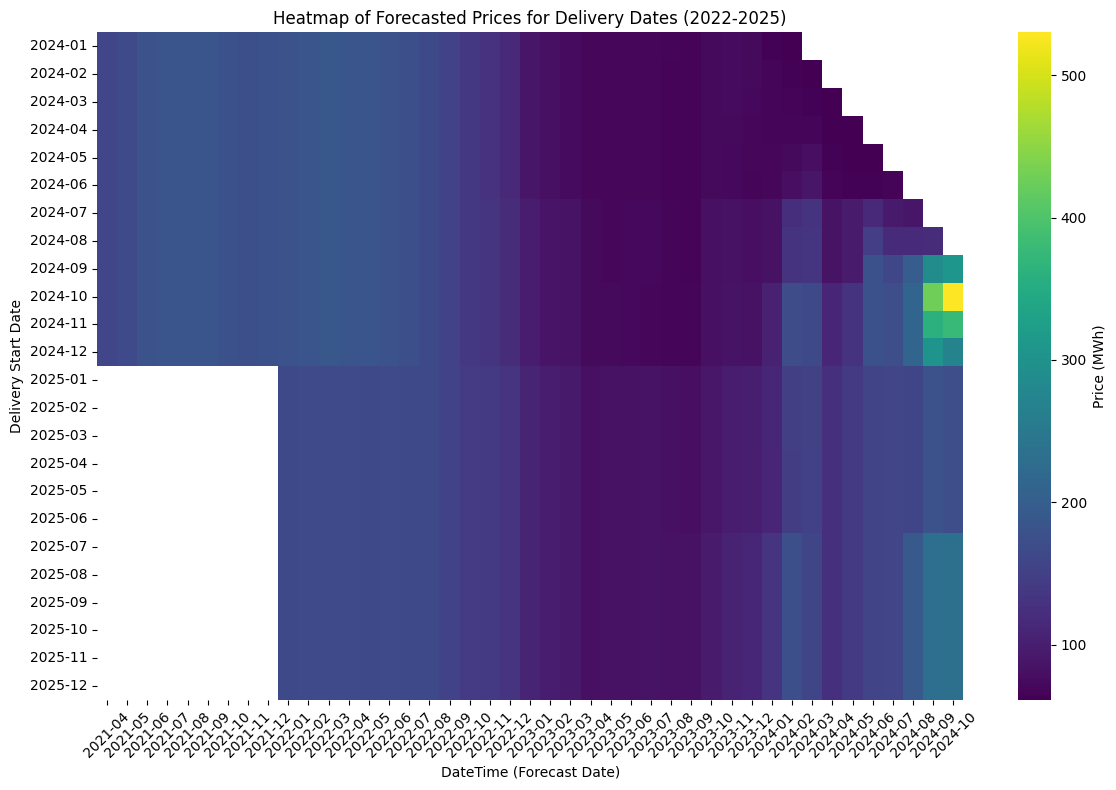

In [12]:
df_2022_2025 = df_market_price[df_market_price['DeliveryStartDate'].between('2024-01-01', '2025-12-31')]

# Convert the DateTime column to only show the date
df_2022_2025['DateTime'] = df_2022_2025['DateTime'].dt.strftime('%Y-%m')
df_2022_2025['DeliveryStartDate'] = df_2022_2025['DeliveryStartDate'].dt.strftime('%Y-%m')

# Pivot the data for the heatmap
heatmap_data = df_2022_2025.pivot_table(index='DeliveryStartDate', columns='DateTime', values='Forward Price')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Price (MWh)'})

plt.title('Heatmap of Forecasted Prices for Delivery Dates (2022-2025)')
plt.xlabel('DateTime (Forecast Date)')
plt.ylabel('Delivery Start Date')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

C:\Users\veron\AppData\Local\Temp\ipykernel_34800\963856730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_2025['DateTime'] = pd.to_datetime(df_2022_2025['DateTime'])
C:\Users\veron\AppData\Local\Temp\ipykernel_34800\963856730.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_2025['DeliveryStartDate'] = pd.to_datetime(df_2022_2025['DeliveryStartDate'])
C:\Users\veron\AppData\Local\Temp\ipykernel_34800\963856730.py:44: UserWarning: Tight layout not applied. The left and right margins 

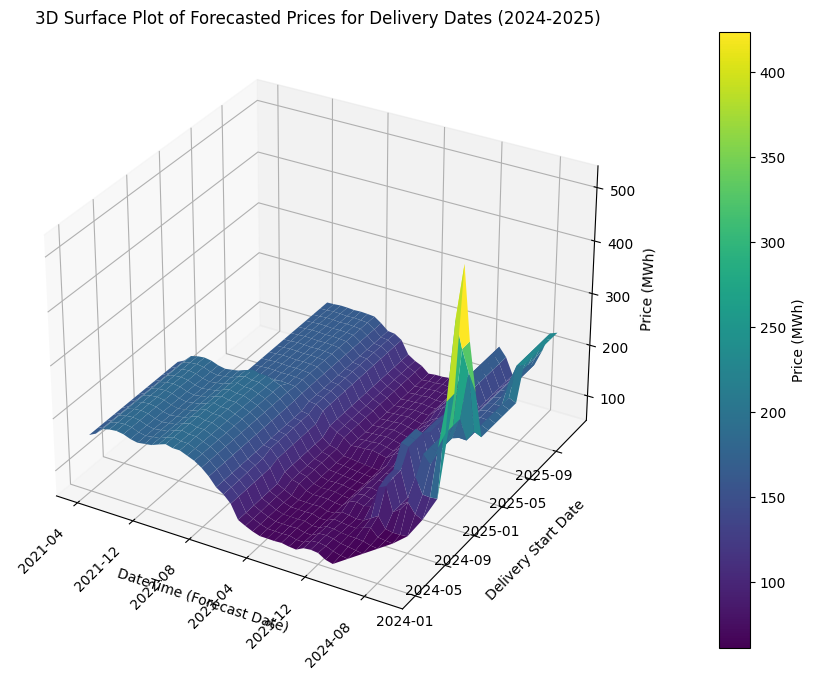

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming df_2022_2025 is already prepared as in your code

# Convert the DateTime and DeliveryStartDate to datetime if they're not already
df_2022_2025['DateTime'] = pd.to_datetime(df_2022_2025['DateTime'])
df_2022_2025['DeliveryStartDate'] = pd.to_datetime(df_2022_2025['DeliveryStartDate'])

# Create a pivot table
pivot_data = df_2022_2025.pivot_table(index='DeliveryStartDate', columns='DateTime', values='Forward Price')

# Create meshgrid
x = np.arange(len(pivot_data.columns))
y = np.arange(len(pivot_data.index))
X, Y = np.meshgrid(x, y)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, pivot_data.values, cmap='viridis')

# Customize the plot
ax.set_xlabel('DateTime (Forecast Date)')
ax.set_ylabel('Delivery Start Date')
ax.set_zlabel('Price (MWh)')
ax.set_title('3D Surface Plot of Forecasted Prices for Delivery Dates (2024-2025)')

# Set x-axis ticks
ax.set_xticks(np.arange(0, len(pivot_data.columns), len(pivot_data.columns)//5))
ax.set_xticklabels(pivot_data.columns[::len(pivot_data.columns)//5].strftime('%Y-%m'), rotation=45, ha='right')

# Set y-axis ticks
ax.set_yticks(np.arange(0, len(pivot_data.index), len(pivot_data.index)//5))
ax.set_yticklabels(pivot_data.index[::len(pivot_data.index)//5].strftime('%Y-%m'), rotation=0, ha='right')

# Add a color bar
fig.colorbar(surf, ax=ax, label='Price (MWh)', pad=0.1)

plt.tight_layout()
plt.show()

How does the market react in predicting the Forward Price for 2024-08-01, based on changes in Settlement Prices between 2024-01-01 and 2024-09-12?

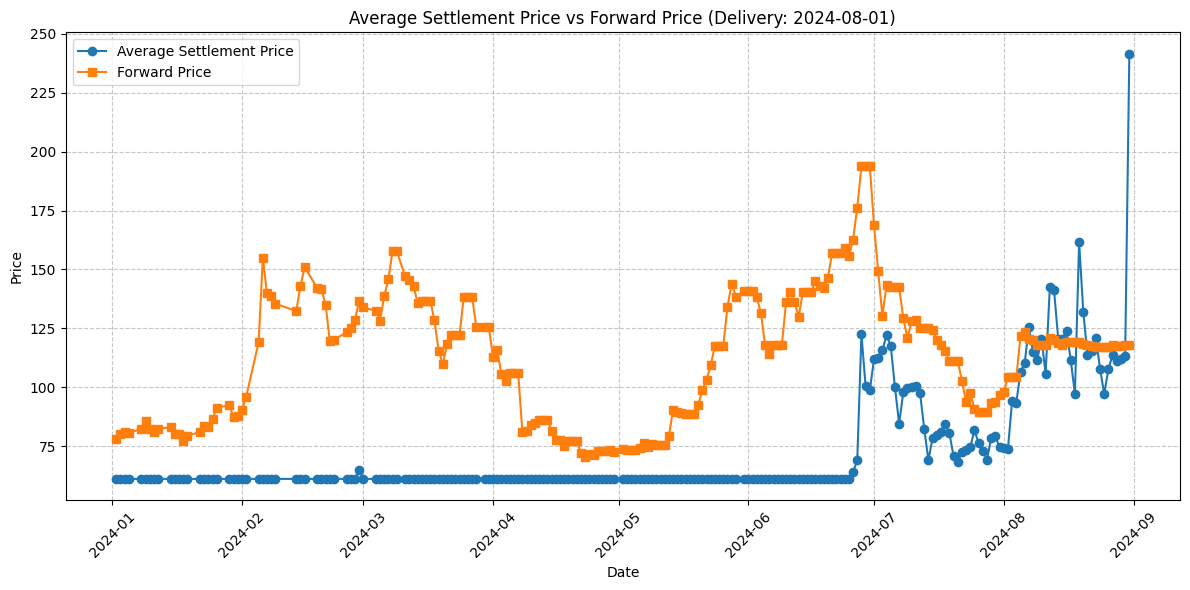

In [14]:
# Filter the data
filtered_df = df_all[
    (df_all['DateTime'] >= '2024-01-01') & 
    (df_all['DateTime'] <= '2024-08-31') & 
    (df_all['DeliveryStartDate'] == '2024-08-01')
]

# Sort the dataframe by Date
filtered_df = filtered_df.sort_values('DateTime')

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['average_settlement_price'], label='Average Settlement Price', marker='o')

# Plot Forward Price
plt.plot(filtered_df['DateTime'], filtered_df['Forward Price'], label='Forward Price', marker='s')

# Customize the plot
plt.title('Average Settlement Price vs Forward Price (Delivery: 2024-08-01)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

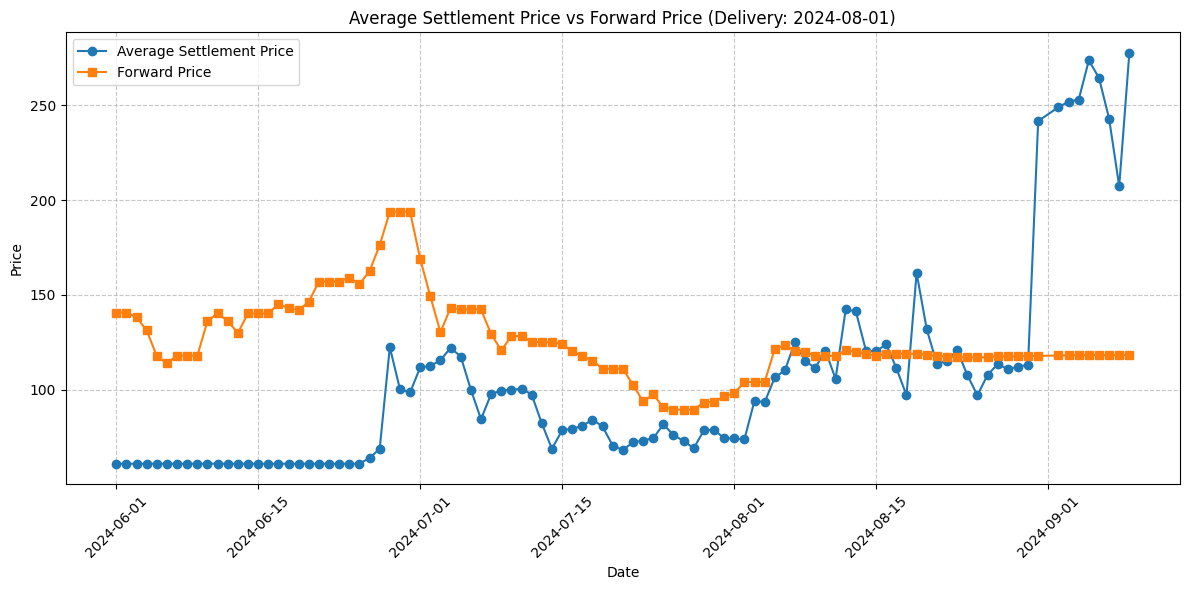

In [15]:
# Filter the data
filtered_df = df_all[
    (df_all['DateTime'] >= '2024-06-01') & 
    (df_all['DateTime'] <= '2024-09-12') & 
    (df_all['DeliveryStartDate'] == '2024-08-01')
]

# Sort the dataframe by Date
filtered_df = filtered_df.sort_values('DateTime')

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['average_settlement_price'], label='Average Settlement Price', marker='o')

# Plot Forward Price
plt.plot(filtered_df['DateTime'], filtered_df['Forward Price'], label='Forward Price', marker='s')

# Customize the plot
plt.title('Average Settlement Price vs Forward Price (Delivery: 2024-08-01)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

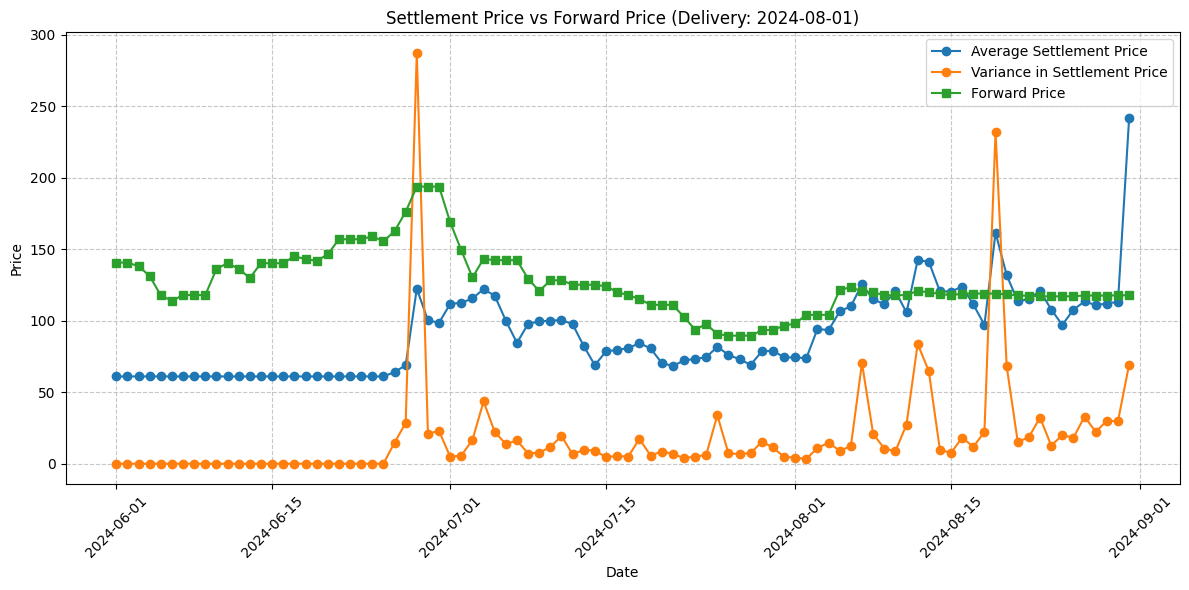

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df_all[
    (df_all['DateTime'] >= '2024-06-01') & 
    (df_all['DateTime'] <= '2024-08-31') & 
    (df_all['DeliveryStartDate'] == '2024-08-01')
]

# Sort the dataframe by Date
filtered_df = filtered_df.sort_values('DateTime')


# Create the plot
plt.figure(figsize=(12, 6))

# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['average_settlement_price'], label='Average Settlement Price', marker='o')

# Plot Settlement Price
plt.plot(filtered_df['DateTime'], filtered_df['std_settlement_price'], label='Variance in Settlement Price', marker='o')

# Plot Forward Price
plt.plot(filtered_df['DateTime'], filtered_df['Forward Price'], label='Forward Price', marker='s')

# Customize the plot
plt.title('Settlement Price vs Forward Price (Delivery: 2024-08-01)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\veron\AppData\Local\Temp\ipykernel_34800\2943879949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_2024['Normalized_Average Settlement Price'] = normalize(df_all_2024['average_settlement_price'])
C:\Users\veron\AppData\Local\Temp\ipykernel_34800\2943879949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_2024['Normalized_Forward Price'] = normalize(df_all_2024['Forward Price'])
C:\Users\veron\AppData\Local\Temp\ipykernel_34800\2943879949.py:15: SettingWithCopyWarning: 
A val

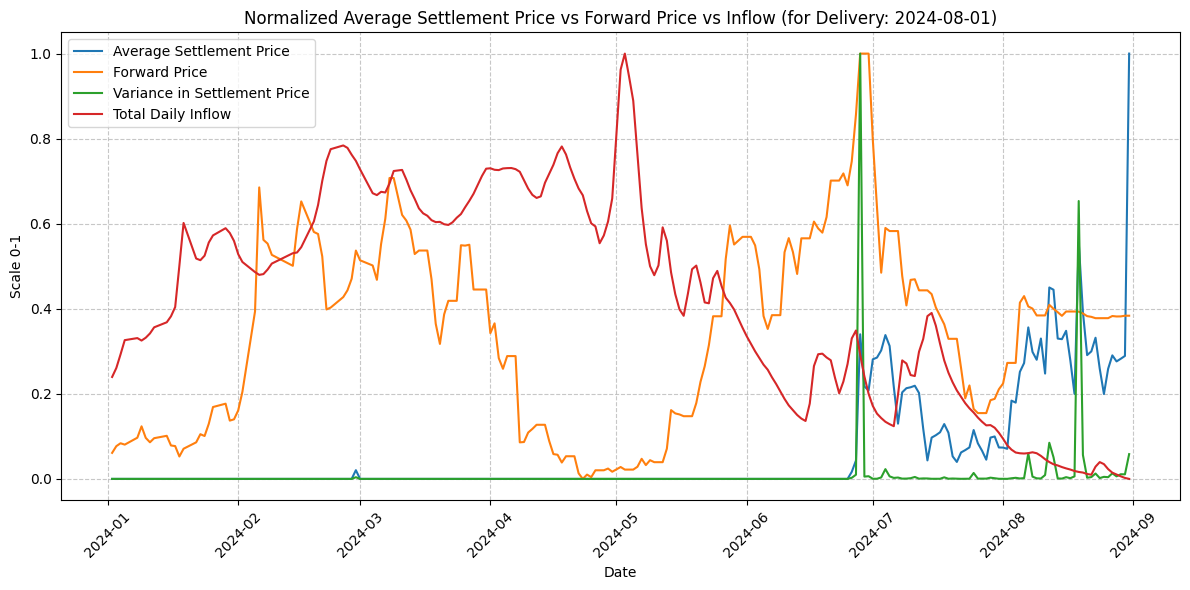

In [17]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())



# Filter the data
df_all_2024 = df_all[
    (df_all['DateTime'] >= '2024-01-01') & 
    (df_all['DateTime'] <= '2024-08-31') & 
    (df_all['DeliveryStartDate'] == '2024-08-01')
]

df_all_2024['Normalized_Average Settlement Price'] = normalize(df_all_2024['average_settlement_price'])
df_all_2024['Normalized_Forward Price'] = normalize(df_all_2024['Forward Price'])
df_all_2024['Normalized_variance'] = normalize(df_all_2024['variance_in_settlement_price'])
df_all_2024['Normalized_Inflow'] = normalize(df_all_2024['Total Daily Inflow'])

# Sort the dataframe by Date
df_all_2024 = df_all_2024.sort_values('DateTime')

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Settlement Price
plt.plot(df_all_2024['DateTime'], df_all_2024['Normalized_Average Settlement Price'], label='Average Settlement Price')

# Plot Forward Price
plt.plot(df_all_2024['DateTime'], df_all_2024['Normalized_Forward Price'], label='Forward Price')
# Plot Settlement Price
plt.plot(df_all_2024['DateTime'], df_all_2024['Normalized_variance'], label='Variance in Settlement Price')

# Plot Inflow Amount
plt.plot(df_all_2024['DateTime'], df_all_2024['Normalized_Inflow'], label='Total Daily Inflow')

# Customize the plot
plt.title('Normalized Average Settlement Price vs Forward Price vs Inflow (for Delivery: 2024-08-01)')
plt.xlabel('Date')
plt.ylabel('Scale 0-1')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()